<a href="https://colab.research.google.com/github/Eistam/CIND820-Project/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank_full_CIND820.csv to bank_full_CIND820.csv


In [4]:
import io
   
df = pd.read_csv(io.BytesIO(uploaded['bank_full_CIND820.csv']))

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#checking if dataset has null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dataset has no missing values

In [9]:
#checking for categotical columns
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced']

Name of Column is: education and unique values are: ['tertiary' 'secondary' 'unknown' 'primary']

Name of Column is: default and unique values are: ['no' 'yes']


Name of Column is: housing and unique values are: ['yes' 'no']

Name of Column is: loan and unique values are: ['no' 'yes']

Name of Column is: contact and unique values are: ['unknown' 'cellular' 'telephone']


Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']





Name of Column is: poutcome and unique values are: ['unknown' 'failure' 'other' 'success']

Name of Column is: y and unique values are: ['no' 'yes']


In [10]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

In [11]:
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)

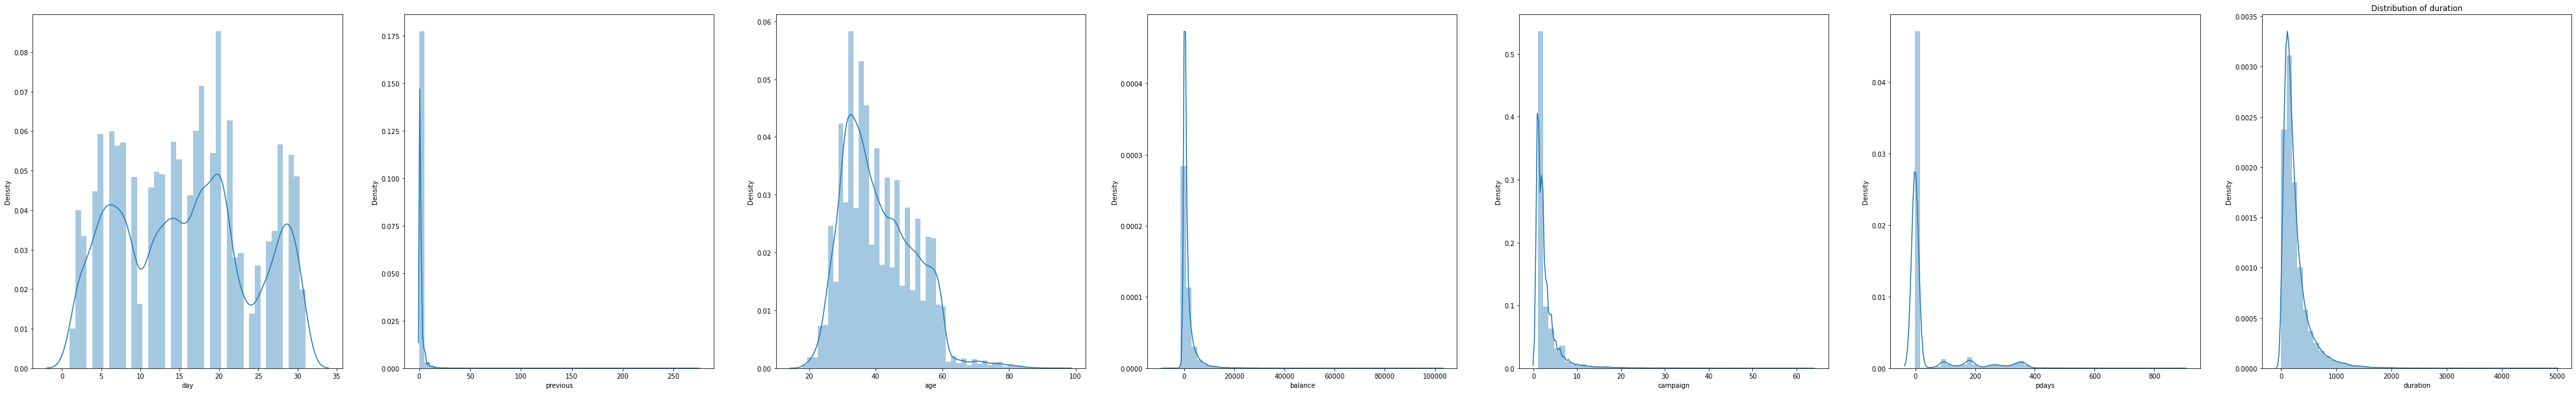

In [12]:
#Checking Distribution For Continuous Variables
check_normal(df)


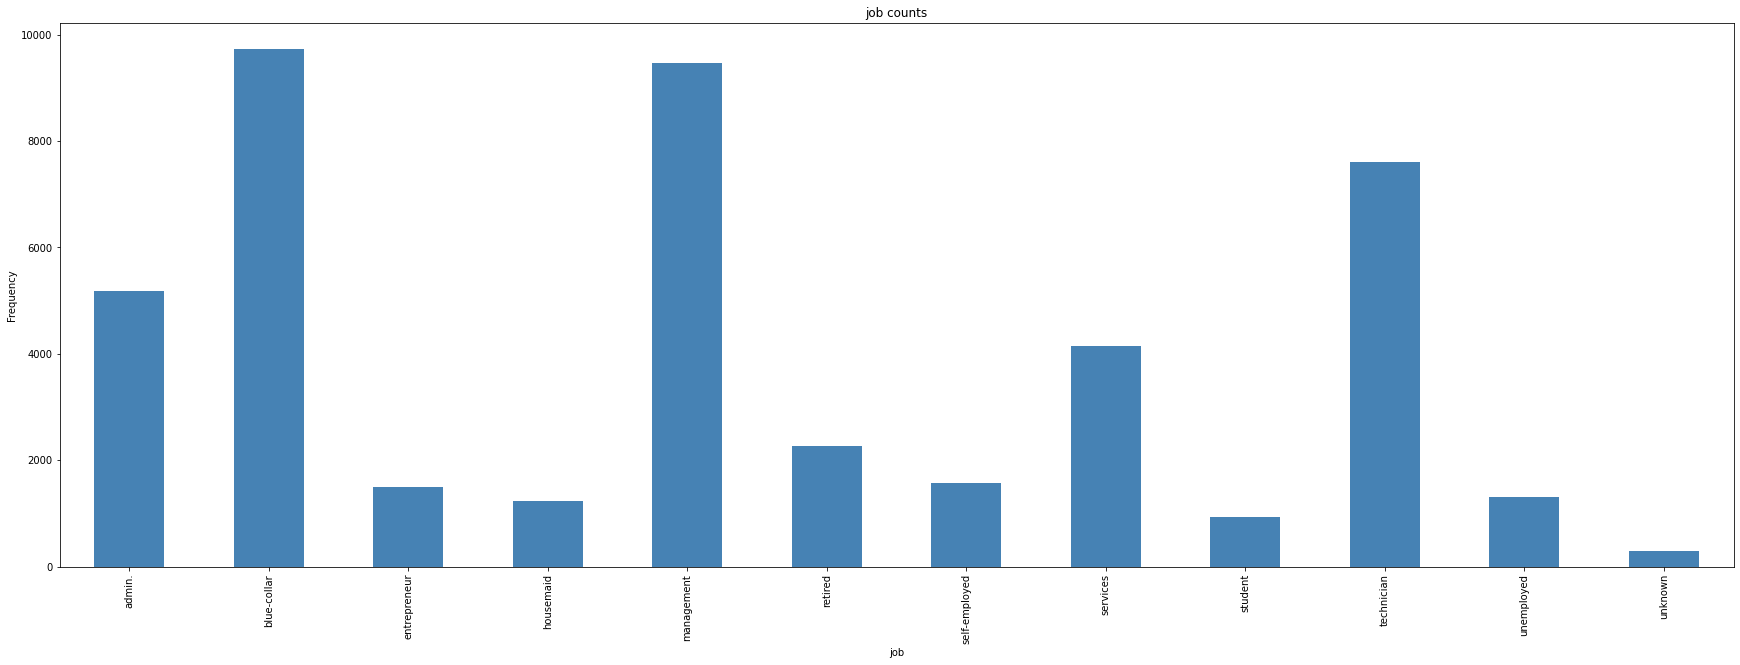

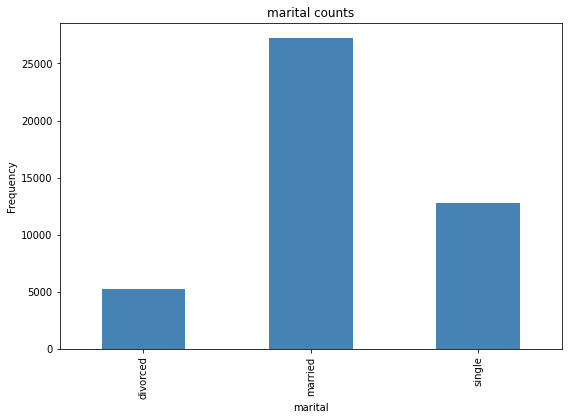

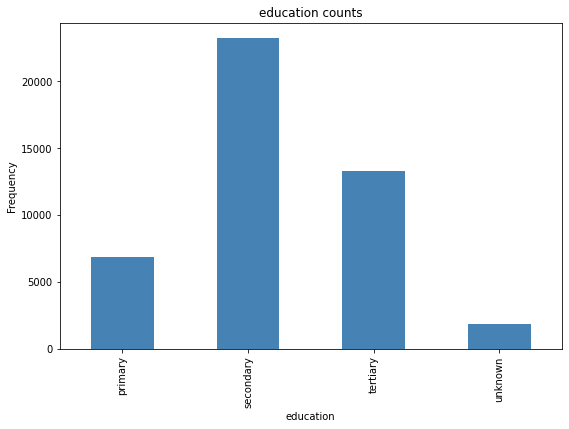

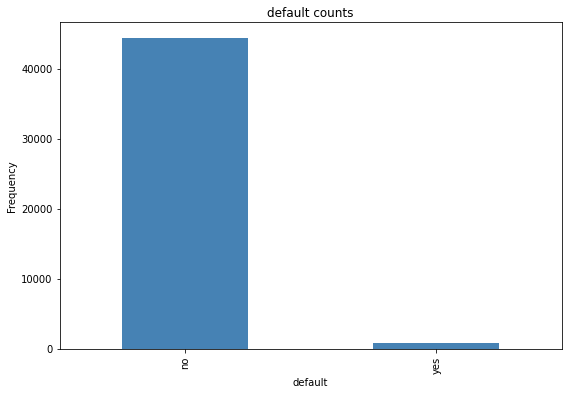

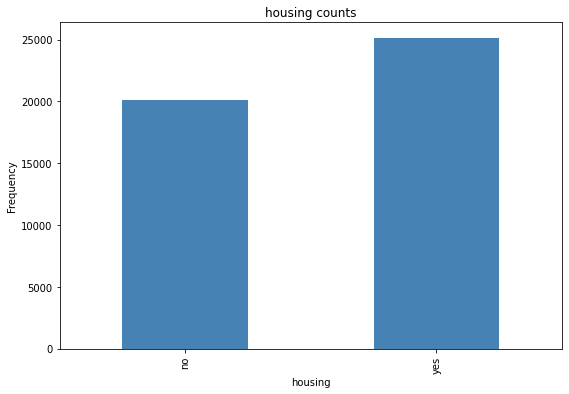

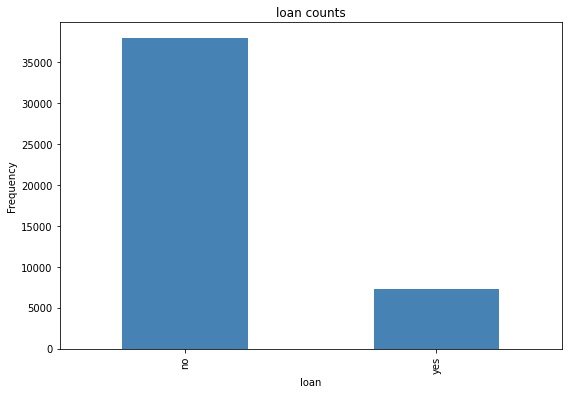

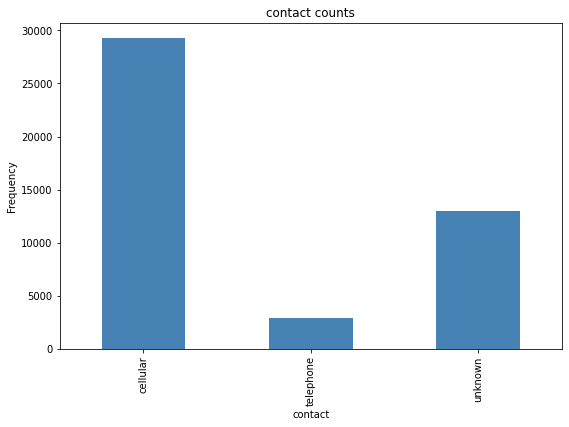

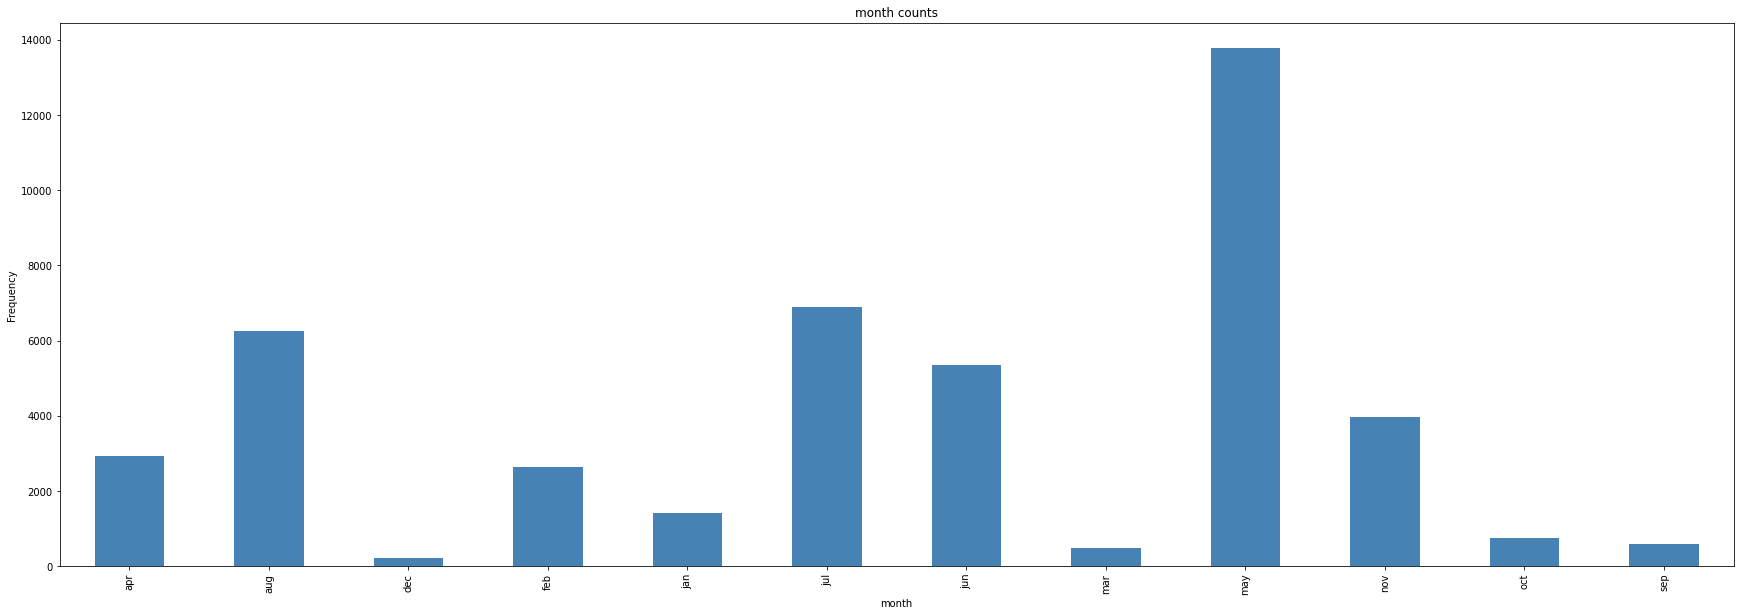

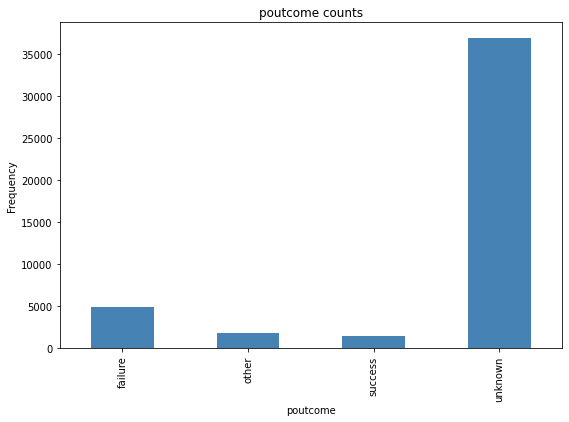

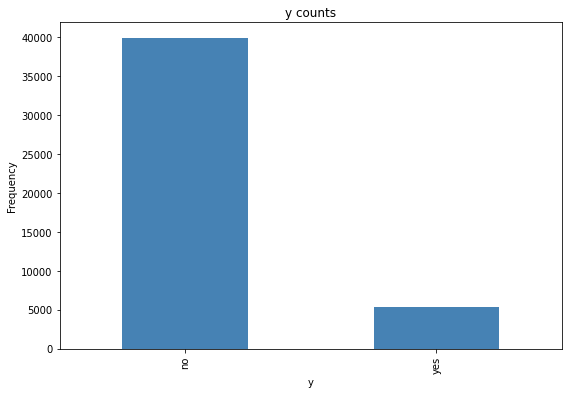

In [13]:
#Plots For Categorical Variables
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [14]:
#summary of the data for attributes with categorical values (with highest figure)
#Job - Management and blue collar 
#Marital - Marrieds
#Education - Secondary
#Default - No
#Housing  - yes
#Loan - No
#Contact - Cellular
#Month - May
#Poutcome - Unknown
#Y - No

In [15]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [17]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


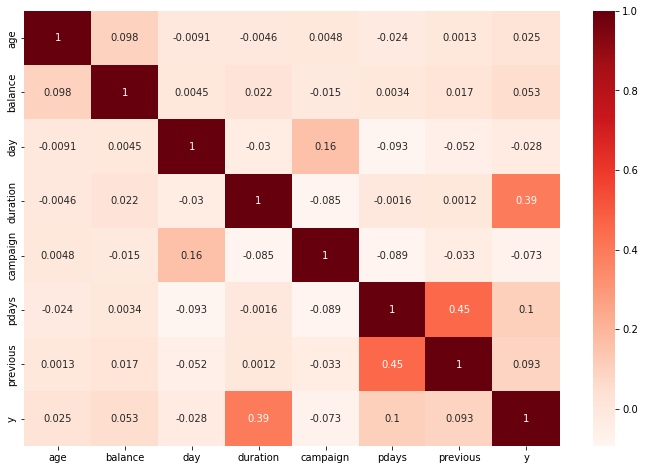

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds", annot = True);

##The correlation matrix was plotted with all qualitative variables.

#The most correlated with target feature (y) is call duration.

#moderate correlation with “pdays”, and mild correlations between “previous”, “balance” and “age”. Their influences on campaign outcome will be investigated further in the machine learning part.


In [19]:
#Checking Unique Values For pdays Column
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

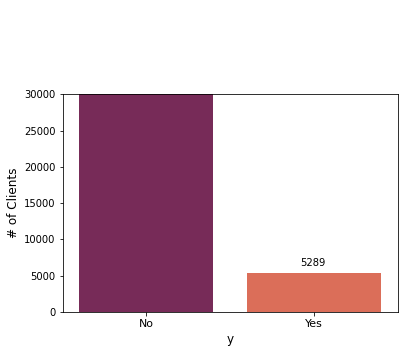

In [20]:
#Check distribution of target variable (y)
plt.figure(figsize=(6,4))

ax = sns.countplot(x="y", data=df, palette="rocket")

plt.xlabel("y", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

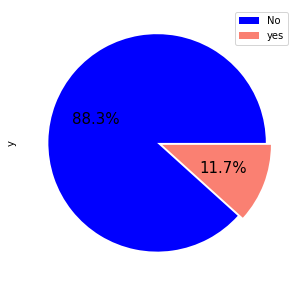

In [49]:
#Check distribution of target variable (y)
plt.figure(figsize=(7,5))

df['y'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No', 'yes'])
plt.show()

#Demographic Features


In [50]:
#checking marital attribute
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [23]:
df['y'].groupby(df['marital']).value_counts(normalize = True)

marital   y
divorced  0    0.880545
          1    0.119455
married   0    0.898765
          1    0.101235
single    0    0.850508
          1    0.149492
Name: y, dtype: float64

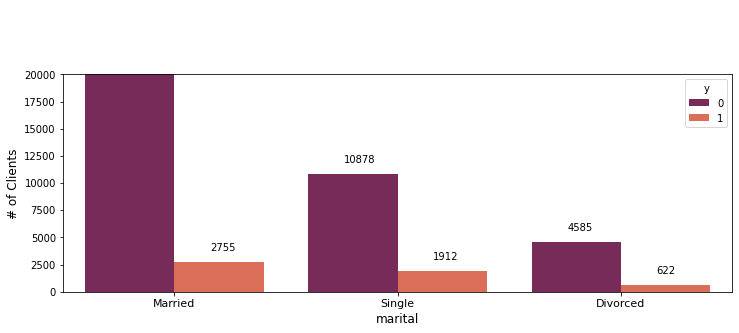

In [24]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'marital', hue="y", palette = 'rocket')

plt.xlabel("marital", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2],[ 'Married', 'Single', 'Divorced'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

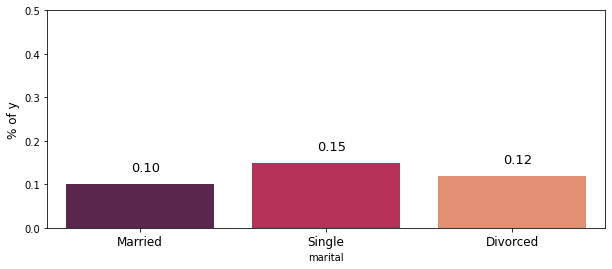

In [25]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "marital", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Divorced'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()


In [26]:
#apparently the persons likely to subscribe to term deposit in accending order according to marital status are singles, divorced and married respectively 

#There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. 

In [27]:
#Checking Housing attribute
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [28]:
df['y'].groupby(df['housing']).value_counts(normalize = True)

housing  y
no       0    0.832976
         1    0.167024
yes      0    0.923000
         1    0.077000
Name: y, dtype: float64

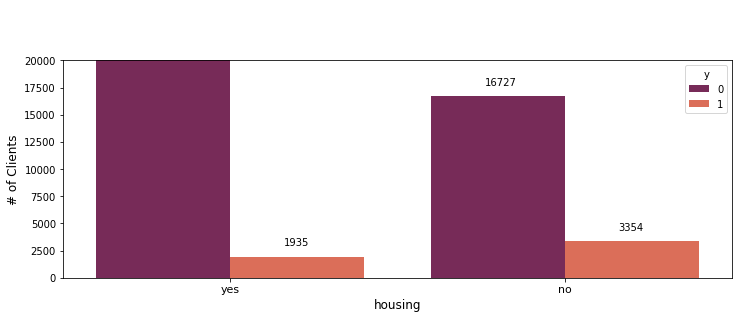

In [29]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'housing', hue="y", palette = 'rocket')

plt.xlabel("housing", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],[ 'yes', 'no'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

In [51]:
#Checking Loan attribute
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [31]:
df['y'].groupby(df['housing']).value_counts(normalize = True)

housing  y
no       0    0.832976
         1    0.167024
yes      0    0.923000
         1    0.077000
Name: y, dtype: float64

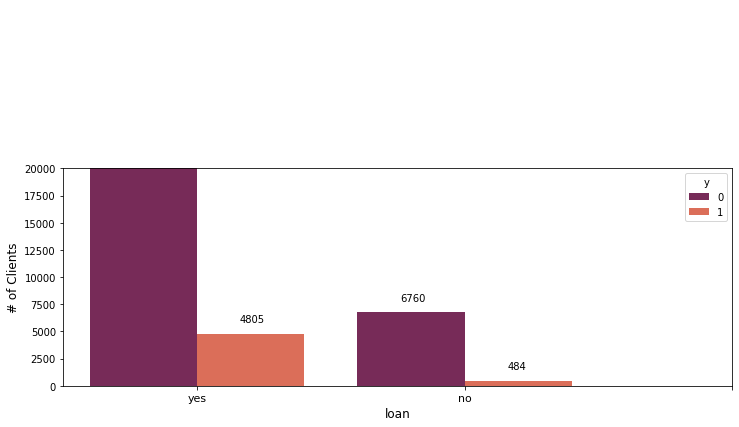

In [32]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'loan', hue="y", palette = 'rocket')

plt.xlabel("loan", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2],[ 'yes', 'no'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

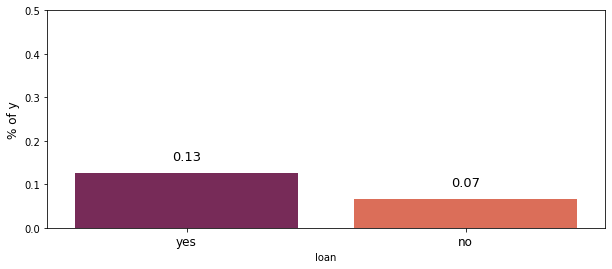

In [33]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "loan", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['yes', 'no'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

In [34]:
Checking Loan attribute
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [35]:
df['y'].groupby(df['month']).value_counts(normalize = True)

month  y
apr    0    0.803206
       1    0.196794
aug    0    0.889867
       1    0.110133
dec    0    0.532710
       1    0.467290
feb    0    0.833522
       1    0.166478
jan    0    0.898788
       1    0.101212
jul    0    0.909065
       1    0.090935
jun    0    0.897772
       1    0.102228
mar    1    0.519916
       0    0.480084
may    0    0.932805
       1    0.067195
nov    0    0.898489
       1    0.101511
oct    0    0.562331
       1    0.437669
sep    0    0.535406
       1    0.464594
Name: y, dtype: float64

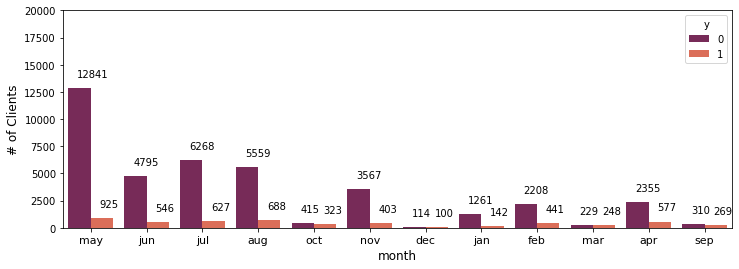

In [36]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'month', hue="y", palette = 'rocket')

plt.xlabel("month", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['may', 'jun', 'jul', 'aug', 'oct', 'nov' ,'dec', 'jan' ,'feb' ,'mar', 'apr', 'sep'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

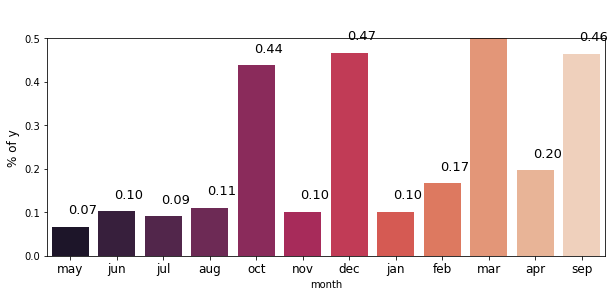

In [37]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "month", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['may', 'jun', 'jul', 'aug', 'oct', 'nov' ,'dec', 'jan' ,'feb' ,'mar', 'apr', 'sep'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

In [52]:
#checking Contact atrribute
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [39]:
df['y'].groupby(df['contact']).value_counts(normalize = True)

contact    y
cellular   0    0.850811
           1    0.149189
telephone  0    0.865795
           1    0.134205
unknown    0    0.959293
           1    0.040707
Name: y, dtype: float64

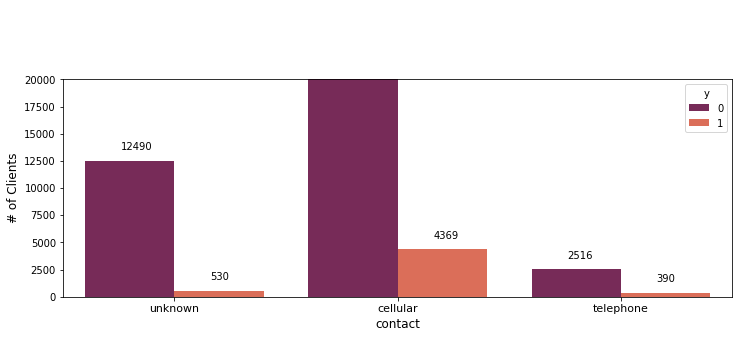

In [40]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'contact', hue="y", palette = 'rocket')

plt.xlabel("contact", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2],['unknown' ,'cellular' ,'telephone'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

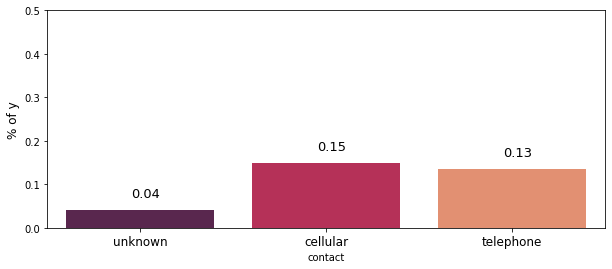

In [41]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "contact", y = "y", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['unknown' ,'cellular' ,'telephone'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

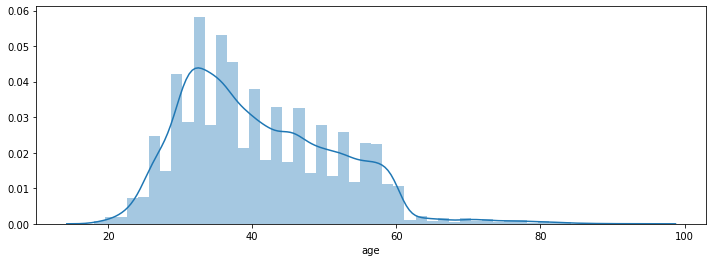

In [53]:
#Checking Age attribute
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

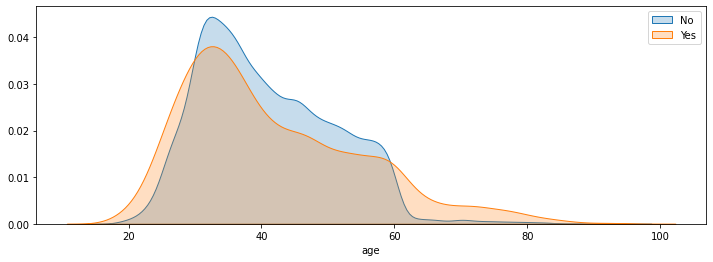

In [90]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['y'] == 0), 'age'], label = 'No ', shade = True)
sns.kdeplot(df.loc[(df['y'] == 1), 'age'], label = 'Yes', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

#Most people in our dataset have between 25 and 40 years old. There is also an impression that around that age the chance of default is a little lower, but we could divide our dataset in bins and check the percentage of default in each age group to be sure.

In [44]:
df['AgeBin'] = pd.cut(df['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(40, 50]    11239
(30, 35]     9877
(50, 60]     8067
(35, 40]     7810
(25, 30]     5694
(20, 25]     1239
(60, 80]     1089
Name: AgeBin, dtype: int64


#The distribution of age: In the telemarketing campaigns, the age range of called by the bank is from 18 to 95 years old. However, a majority of customers called is in the age of 40s and 50s 

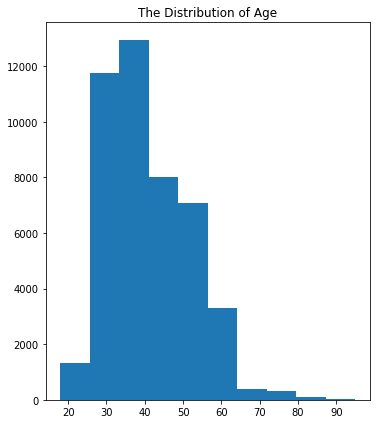

In [60]:
dist_age_y = plt.figure(figsize = (10,6))

ra1 = dist_age_y.add_subplot(1,2,1) 


ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')


plt.tight_layout() 
plt.show()


The distribution of customer age is fairly normal with a small standard deviation.

In [45]:
df['y'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin    y
(20, 25]  0    0.768362
          1    0.231638
(25, 30]  0    0.855111
          1    0.144889
(30, 35]  0    0.894300
          1    0.105700
(35, 40]  0    0.901665
          1    0.098335
(40, 50]  0    0.909334
          1    0.090666
(50, 60]  0    0.899467
          1    0.100533
(60, 80]  0    0.578512
          1    0.421488
Name: y, dtype: float64

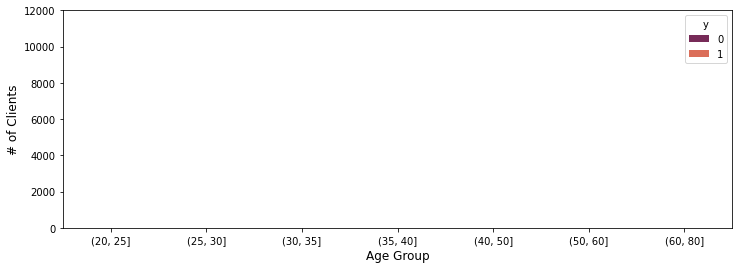

In [95]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="y", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

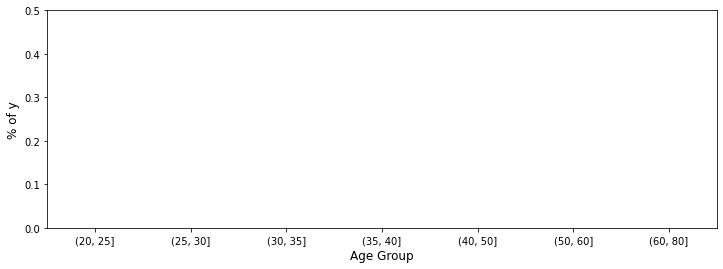

In [48]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "y", data = df, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()


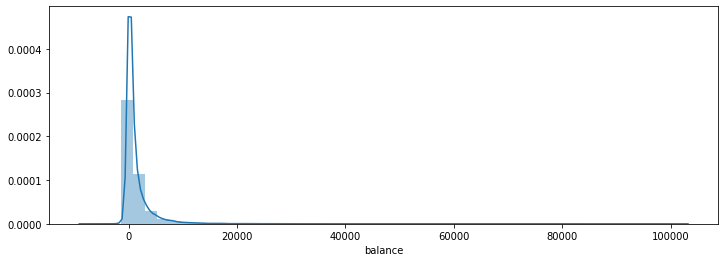

In [61]:
# Resonse (y) by Balance
plt.figure(figsize=(12,4))

sns.distplot(df['balance'])
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

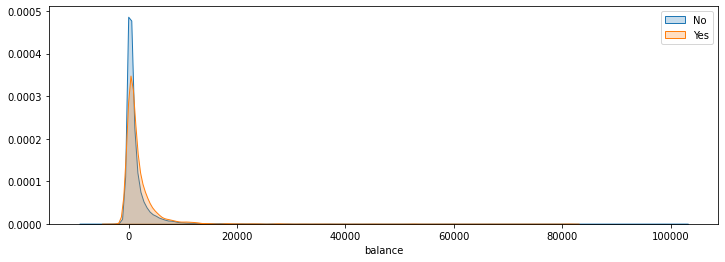

In [63]:

plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['y'] == 0), 'balance'], label = 'No ', shade = True)
sns.kdeplot(df.loc[(df['y'] == 1), 'balance'], label = 'Yes', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()


In [84]:
df['BalBin'] = pd.cut(df['balance'],[0, 500, 1000, 2000,5000, 110000])
print(df['BalBin'].value_counts())

(0, 500]          16385
(500, 1000]        6915
(1000, 2000]       6130
(2000, 5000]       5656
(5000, 110000]     2845
Name: BalBin, dtype: int64


In [85]:
df['y'].groupby(df['BalBin']).value_counts(normalize = True)

BalBin          y
(0, 500]        0    0.897467
                1    0.102533
(500, 1000]     0    0.875777
                1    0.124223
(1000, 2000]    0    0.863132
                1    0.136868
(2000, 5000]    0    0.828854
                1    0.171146
(5000, 110000]  0    0.844991
                1    0.155009
Name: y, dtype: float64

In [101]:
plt.figure(figsize=(12,4))

df['BalBin'] = df['BalBin'].astype('str')
BalBin_order = ['0, 500]', '(500, 1000]', '(1000, 2000]', '(2000, 5000]',
                '(5000, 110000]']

ax = sns.countplot(data = df, x = 'BalBin', hue="balance", palette = 'rocket', order = BalBin_order)

plt.xlabel("Amount of Balance", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

ValueError: ignored

<Figure size 864x288 with 1 Axes>

In [100]:
lst = [df]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

#Compare those who responded to term deposit (y) to demographic features

In [107]:
# y vs Marital and Balance
df.groupby('marital')['balance'].mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

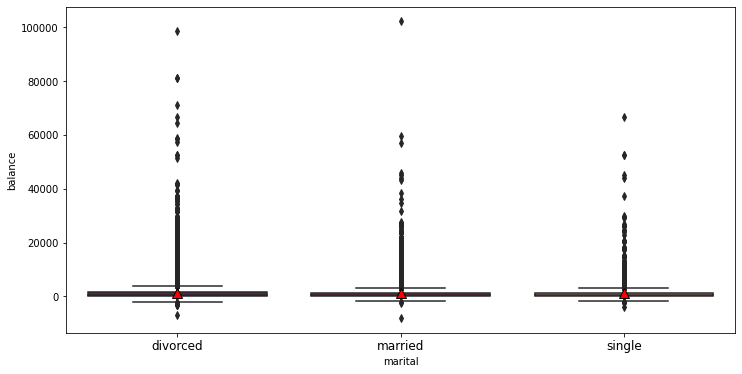

In [109]:

plt.figure(figsize=(12,6))

sns.boxplot(x = "marital", y = "balance",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['divorced', 'married', 'single'], fontsize = 12)

plt.show()

In [110]:
#Education vs balance
df.groupby('education')['balance'].mean()

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

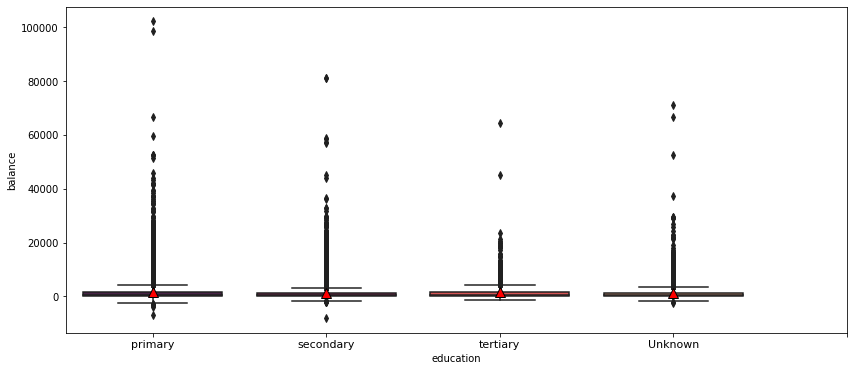

In [111]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "education", y = "balance", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['primary','secondary','tertiary','Unknown'], fontsize = 11)

plt.show()


In [113]:
df.groupby('AgeBin')['balance'].mean()

AgeBin
(20.0, 25.0]     915.439871
(25.0, 30.0]    1048.573937
(30.0, 35.0]    1204.057204
(35.0, 40.0]    1274.139693
(40.0, 50.0]    1368.076519
(50.0, 60.0]    1737.709681
(60.0, 80.0]    2613.942149
nan             2045.250000
Name: balance, dtype: float64

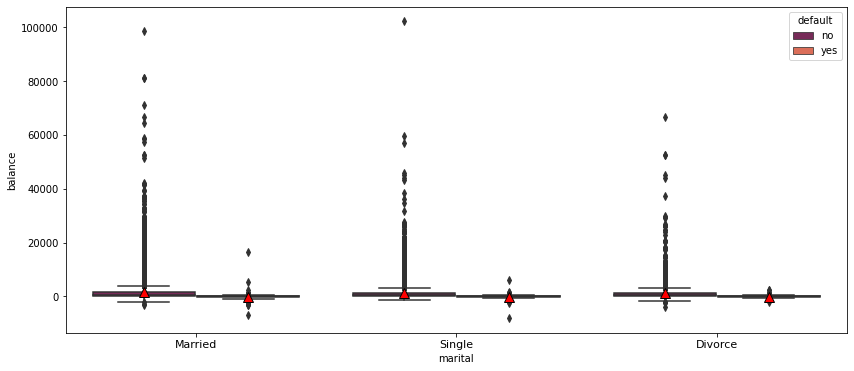

In [116]:
#Marital vs Balance vs Default
plt.figure(figsize=(14,6))

sns.boxplot(x = "marital", y = "balance", hue = 'default', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

Prepare Data for Classification



In [117]:
#make a copy of dataset and separate the features from the target variable.
X = df.copy().drop('y', axis = 1)
Y = df['y']

In [119]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,AgeBin,BalBin,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,"(50.0, 60.0]","(2000.0, 5000.0]",average balance
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,"(40.0, 50.0]","(0.0, 500.0]",low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,"(30.0, 35.0]","(0.0, 500.0]",low balance
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,"(40.0, 50.0]","(1000.0, 2000.0]",average balance
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,"(30.0, 35.0]","(0.0, 500.0]",low balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,"(50.0, 60.0]","(500.0, 1000.0]",low balance
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,"(60.0, 80.0]","(1000.0, 2000.0]",average balance
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,"(60.0, 80.0]","(5000.0, 110000.0]",high balance
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,"(50.0, 60.0]","(500.0, 1000.0]",low balance


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   housing        45211 non-null  object
 7   loan           45211 non-null  object
 8   contact        45211 non-null  object
 9   day            45211 non-null  int64 
 10  month          45211 non-null  object
 11  duration       45211 non-null  int64 
 12  campaign       45211 non-null  int64 
 13  pdays          45211 non-null  int64 
 14  previous       45211 non-null  int64 
 15  poutcome       45211 non-null  object
 16  AgeBin         45211 non-null  object
 17  BalBin         45211 non-null  object
 18  balance_group  45211 non-n

#The first approach will be to use only the original features. We will create a copy of 'X' and remove the created features from it.

In [130]:
df  = pd.get_dummies(df, drop_first = True)

In [ ]:

dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)

In [141]:
x = df.drop("y", axis=1)
y = df['y']
x.sample()

test_size= 0.20
seed = 7
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=seed)

In [142]:
rf_model = RandomForestClassifier(random_state = seed)

rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)

print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_rf))

Test Accuracy:  0.9076351411129788


#The Random Forest yielded an accuracy of 90.76% which potentially looks like a good score. However, EDA section indicated that the data was not balance since many custeomers did not respond positively to the term deposit telemarketing

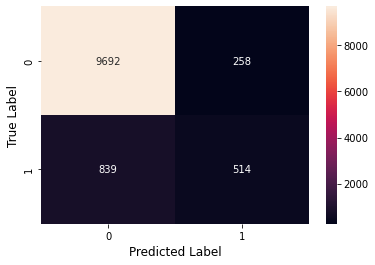

In [138]:
rf_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


In [139]:
print(metrics.classification_report(y_test, pred_rf, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9950
           1       0.67      0.38      0.48      1353

    accuracy                           0.90     11303
   macro avg       0.79      0.68      0.72     11303
weighted avg       0.89      0.90      0.89     11303

